# Goal

* Testing options for genome reference dataset download 

In [1]:
%load_ext rpy2.ipython

In [5]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)
library(genomes)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: XML

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘XML’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:tools’:

    toHTML


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: RCurl

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: bitops

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robje

In [10]:
%%R
data(proks)
summary(proks)

$`Total genomes`
[1] 27570 genome projects on Sep 04, 2014

$`By status`
                     Total
Contig               13074
Scaffold             10718
Gapless Chromosome    3053
Chromosome             373
Chromosome with gaps   343
Complete                 9

$`Recent submissions`
  released   name                      status  
1 2014-09-02 Altuibacter lentus        Scaffold
2 2014-09-02 Bacillus cereus ATCC 4342 Scaffold
3 2014-09-02 Bacillus licheniformis    Scaffold
4 2014-09-02 Bacillus megaterium       Scaffold
5 2014-09-02 Paenibacillus macerans    Scaffold



In [11]:
%%R
update(proks)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: proks has been successfully updated

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 29217 new project IDs added

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 235 old project IDs removed

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [12]:
%%R
summary(proks)

$`Total genomes`
[1] 57093 genome projects on Jan 06, 2016

$`By status`
                Total
Contig          34539
Scaffold        17035
Complete Genome  4649
Chromosome        870

$`Recent submissions`
  released   name                       status         
1 2015-12-30 Listeria monocytogenes     Complete Genome
2 2015-12-30 Listeria monocytogenes     Complete Genome
3 2015-12-30 Listeria monocytogenes     Complete Genome
4 2015-12-30 Tenacibaculum dicentrarchi Complete Genome
5 2015-12-29 Acinetobacter johnsonii    Contig         



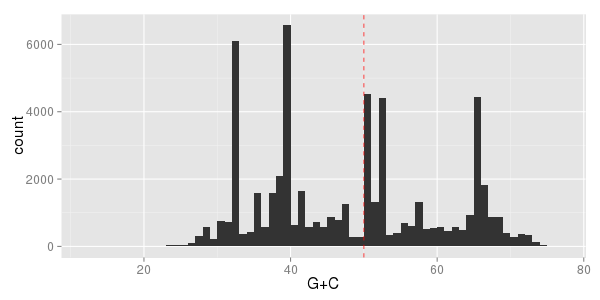

In [23]:
%%R -w 600 -h 300
# plotting GC distribution
ggplot(proks, aes(gc)) +
    geom_histogram(binwidth=1) +
    geom_vline(xintercept=50, linetype='dashed', color='red', alpha=0.7) +
    labs(x='G+C') +
    theme(
        text = element_text(size=16)
    )

In [17]:
%%R
proks.complete = proks %>% as.data.frame %>% 
    filter(status == 'Complete Genome')
proks.complete %>% head

     pid                                     name          status   released
1  12997           Acaryochloris marina MBIC11017 Complete Genome 2007-10-16
2  60713           Acetobacterium woodii DSM 1030 Complete Genome 2012-02-14
3 242487                 Acetobacter pasteurianus Complete Genome 2015-07-21
4 214045            Acetobacter pasteurianus 386B Complete Genome 2013-08-01
5  31129     Acetobacter pasteurianus IFO 3283-01 Complete Genome 2009-08-27
6  31141 Acetobacter pasteurianus IFO 3283-01-42C Complete Genome 2009-08-27
    taxid  bioproject          group              subgroup    size      gc
1  329726  PRJNA12997  Cyanobacteria Oscillatoriophycideae 8.36160 46.9889
2  931626  PRJNA60713     Firmicutes            Clostridia 4.04478 39.3000
3     438 PRJNA242487 Proteobacteria   Alphaproteobacteria 2.80615 53.3000
4 1266844   PRJEB1172 Proteobacteria   Alphaproteobacteria 3.07865 52.8532
5  634452  PRJDA31129 Proteobacteria   Alphaproteobacteria 3.34025 53.0701
6  634458  

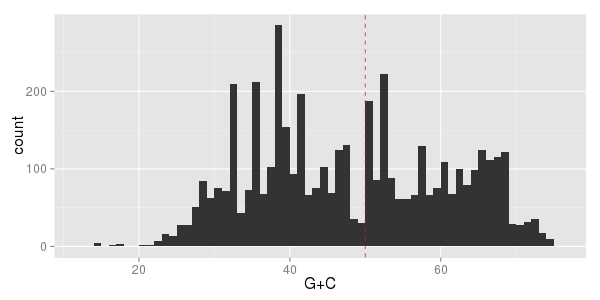

In [21]:
%%R -w 600 -h 300
# plotting GC distribution
ggplot(proks.complete, aes(gc)) +
    geom_histogram(binwidth=1) +
    geom_vline(xintercept=50, linetype='dashed', color='red', alpha=0.7) +
    labs(x='G+C') +
    theme(
        text = element_text(size=16)
    )

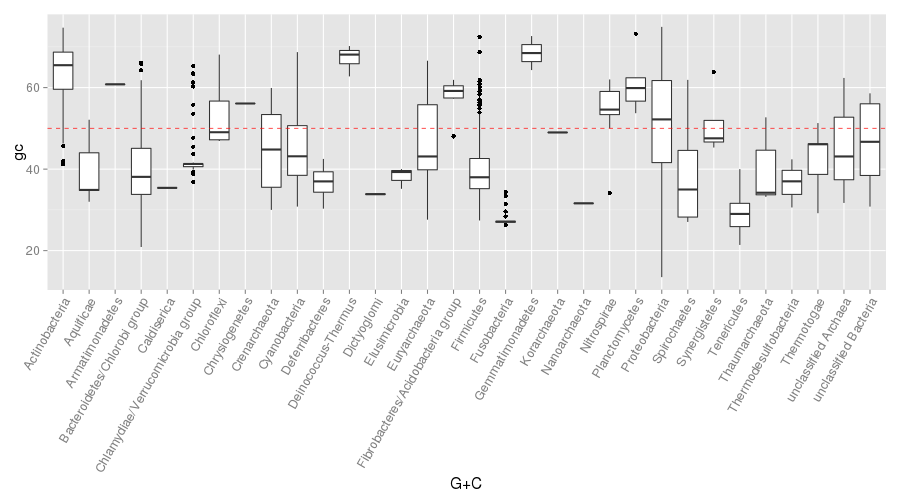

In [29]:
%%R -w 900 -h 500
# plotting GC distribution
ggplot(proks.complete, aes(group, gc)) +
    geom_boxplot() +
    geom_hline(yintercept=50, linetype='dashed', color='red', alpha=0.7) +
    labs(x='G+C') +
    theme(
        text = element_text(size=16),
        axis.text.x = element_text(angle=60, hjust=1)
    )